# Importing library, reading dataset and getting it's information

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Crop_growth.csv')

In [3]:
df.shape

(2200, 8)

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# Checking unique values

In [8]:
df.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [9]:
df['label'].value_counts()

orange         100
papaya         100
mothbeans      100
coffee         100
coconut        100
jute           100
chickpea       100
blackgram      100
pigeonpeas     100
grapes         100
watermelon     100
muskmelon      100
apple          100
maize          100
lentil         100
mango          100
banana         100
rice           100
mungbean       100
cotton         100
pomegranate    100
kidneybeans    100
Name: label, dtype: int64

# Checking null values

In [10]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

# Data Visualization

In [11]:
%matplotlib inline

array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

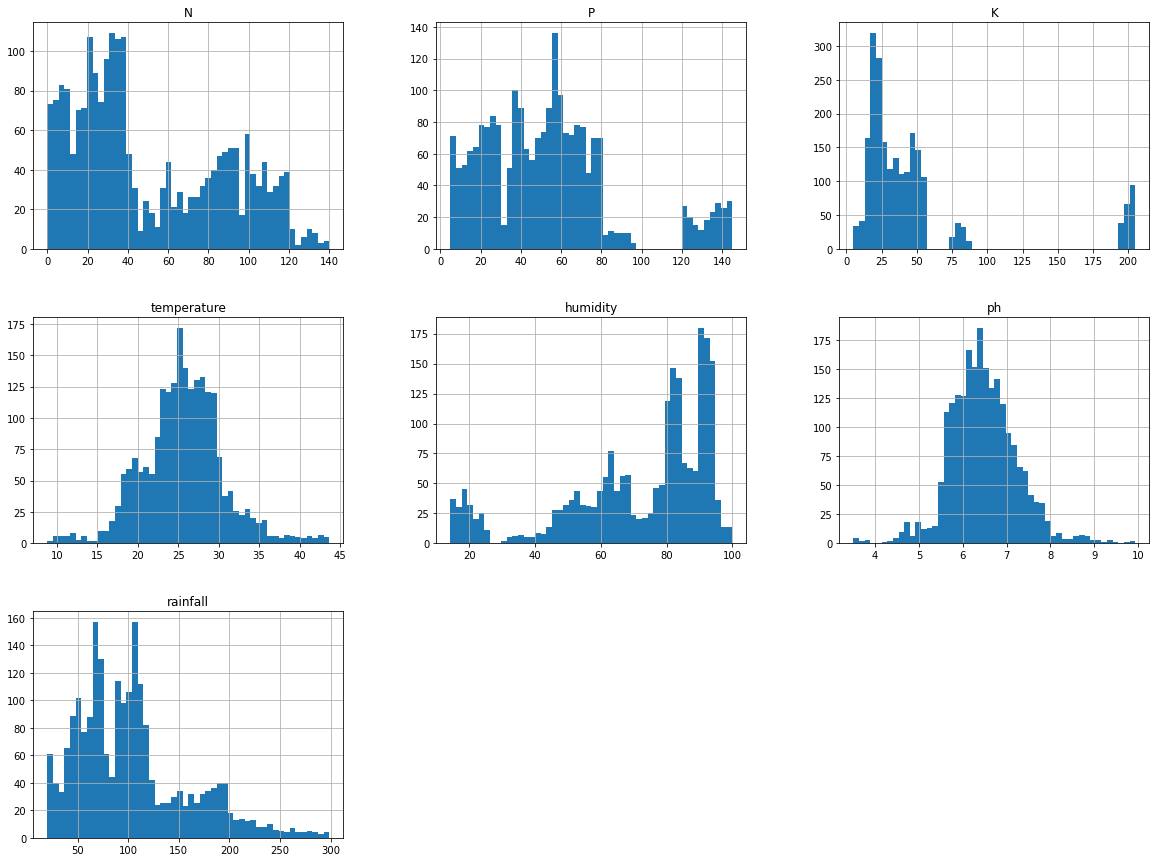

In [12]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

# Correlation

In [13]:
corr_matrix = df.corr()

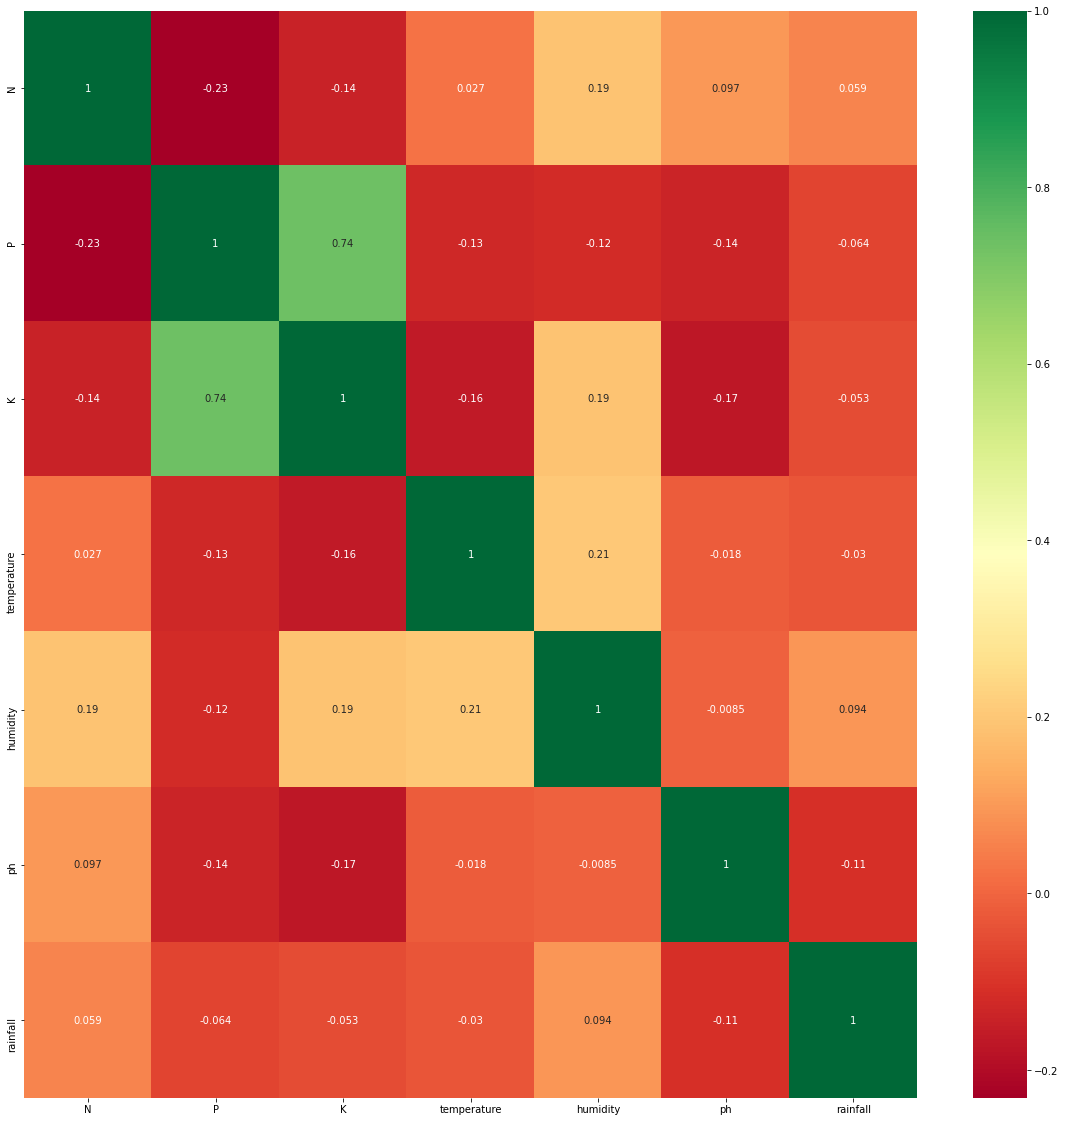

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get correlation of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [15]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


# Train-Test Split

In [16]:
model = []
accuracy = []

In [17]:
X = df.drop('label' ,axis =1)

In [18]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [19]:
y = df['label']

In [20]:
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# Machine Learning Algorithms

# 1. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
DT = DecisionTreeClassifier()

In [25]:
DT.fit(X_train , y_train)

DecisionTreeClassifier()

# Cross Validation: cross_val_score

In [26]:
DT_accuracy = DT.score(X_test,y_test)

In [27]:
DT_accuracy

0.9886363636363636

In [28]:
accuracy.append(DT_accuracy)

In [29]:
model.append('Decision Tree')

# 2. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf = LogisticRegression()

In [32]:
clf.fit(X_train , y_train)

d:\python 3.7.1\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# Cross Validation: cross_val_score

In [33]:
clf_accuracy = clf.score(X_test,y_test)

In [34]:
clf_accuracy

0.9454545454545454

In [35]:
accuracy.append(clf_accuracy)

In [36]:
model.append('Logistic Regression')

# 3. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
RF = RandomForestClassifier()

In [39]:
RF.fit(X_train , y_train)

RandomForestClassifier()

# Cross Validation: cross_val_score

In [40]:
RF_accuracy = RF.score(X_test,y_test)

In [41]:
RF_accuracy

0.9931818181818182

In [42]:
accuracy.append(RF_accuracy)

In [43]:
model.append('Random Forest')

# 4. XGBoost Classifier

In [44]:
import xgboost as xgb

In [45]:
XGB = xgb.XGBClassifier()

In [46]:
XGB.fit(X_train,y_train)

d:\python 3.7.1\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Cross Validation: cross_val_score

In [47]:
XGB_accuracy = XGB.score(X_test,y_test)

In [48]:
XGB_accuracy

0.990909090909091

In [49]:
accuracy.append(XGB_accuracy)

In [50]:
model.append('XGBoost')

# 4. Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
clf1 = LogisticRegression()

In [53]:
clf1.fit(X_train , y_train)

d:\python 3.7.1\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# Cross Validation: cross_val_score

In [54]:
clf1_accuracy = clf.score(X_test,y_test)

In [55]:
clf1_accuracy

0.9454545454545454

In [56]:
accuracy.append(clf1_accuracy)

In [57]:
model.append('Linear Regression')

# Compairing the accuracy of all the algorithms

In [58]:
model

['Decision Tree',
 'Logistic Regression',
 'Random Forest',
 'XGBoost',
 'Linear Regression']

In [59]:
accuracy

[0.9886363636363636,
 0.9454545454545454,
 0.9931818181818182,
 0.990909090909091,
 0.9454545454545454]

In [60]:
print("Random Forest algorithm has the highest accuracy ")

Random Forest algorithm has the highest accuracy 


# F1 Score, Precision and Recall  Random Forest

In [61]:
preds = RF.predict(X_test)

In [62]:
from sklearn import metrics
from sklearn.metrics import classification_report
x = metrics.accuracy_score(y_test, preds)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

# Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
y_predicted = RF.predict(X_test)

In [65]:
cm = confusion_matrix(y_test, y_predicted)

In [66]:
cm

array([[23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,

In [67]:
import seaborn as sn

Text(69.0, 0.5, 'Truth')

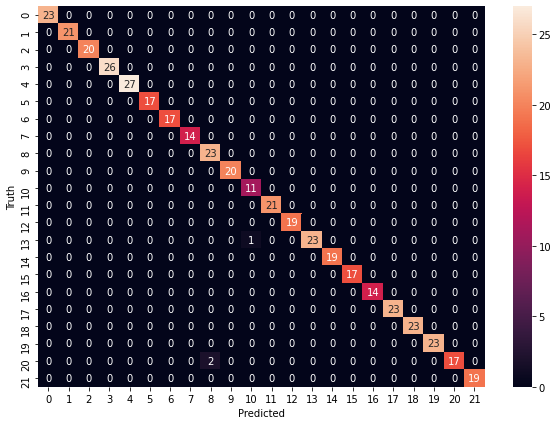

In [68]:
plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Predicting the output on our input

In [69]:
# Give the value of (N, P, K, Temperature, Humidity, ph, Rainfall)
import numpy as np
data = np.array([[45, 35, 22, 56, 22, 2, 888]])
prediction = RF.predict(data)
print(prediction)

['kidneybeans']
